In [1]:
# Collect data for figures and tables
import collections

import compress_pickle
import itertools
import libsbml
import numpy as np
import os
import pickle
import pandas as pd
import sys
import time
import matplotlib.pyplot as plt
%matplotlib inline  

BIOMD_12 = 'BIOMD0000000012.xml'
BASE_DIR = '/Users/woosubs/Desktop/AutomateAnnotation/'
DATA_DIR = os.path.join(BASE_DIR, "DATA")
ALGO_DIR = os.path.join(DATA_DIR, "algo")
CHEBI_DIR = os.path.join(DATA_DIR, "chebi")
RHEA_DIR = os.path.join(DATA_DIR, "rhea")
BIOMODEL_DIR = os.path.join(DATA_DIR, "biomodels/curated_biomodels_31mar2021")
BIGG_DIR = '/Users/woosubs/Desktop/AutomateAnnotation/DATA/bigg'
ecoli_fpath = os.path.join(BIGG_DIR, "e_coli_core.xml")

PROJ_DIR = os.path.join(os.getcwd(), os.pardir)
AMAS_DIR = os.path.join(PROJ_DIR, "AMAS")
sys.path.append(PROJ_DIR)

SUPPL_DIR = os.path.join(PROJ_DIR, os.pardir, "AMAS_suppl")
ACCURACY_DIR = os.path.join(SUPPL_DIR, "data_for_credibility")

from AMAS import species_annotation as sa
from AMAS import reaction_annotation as ra
from AMAS import recommender
from AMAS import constants as cn
from AMAS import iterator as it
from AMAS import tools

In [2]:
E_COLI_PATH = os.path.join(cn.TEST_DIR, 'e_coli_core.xml')
recom = recommender.Recommender(libsbml_fpath=E_COLI_PATH)

In [3]:
########## Result Table 1. ######################
#################################################


# TODO: first, get number of biomodels with annotations, 
# each for species and reactions; and for biomodels and BiGG

#################################################
# using csv data obtained from REF_ML, get
# 1. list (number) of (bio)models; numbers of total species/reactions
# 2. numbers of annotated species/reactions
#################################################

#################################################
# using csv data obtained from REF_ML, get
# 1. Prediction time (of the same biomodels)
# 2. Recall
# 3. Precision
#################################################


#################################################
# Can repeat this for BiGG models :) 
# But for BiGG, need to collect information again. 
#################################################

In [4]:
spec_ml_df = pd.read_csv(os.path.join(ACCURACY_DIR, 'biomd_individual_species_accuracy.csv'))
spec_ml_df.head()

,model,name_length,num_candidates,num_formulas,match_score,accuracy
0,BIOMD0000000634.xml,3,6,5,1.000,1
1,BIOMD0000000634.xml,3,13,11,1.000,1
2,BIOMD0000000634.xml,3,14,12,1.000,1
3,BIOMD0000000152.xml,2,7,5,1.000,1
4,BIOMD0000000152.xml,15,1,1,0.873,0


In [5]:
spec_biomodels = np.unique(spec_ml_df['model'])
print("Number of Spec Models: %d" % len(spec_biomodels))
num_specs = dict()
num_spec_anoted = dict(collections.Counter(spec_ml_df['model']))
for idx, one_biomd in enumerate(spec_biomodels):
  if idx % 100 == 0:
    print("(running--- We are at %d.)" % idx)
  one_fpath = os.path.join(BIOMODEL_DIR, one_biomd)
  reader = libsbml.SBMLReader()
  document = reader.readSBML(one_fpath)
  model = document.getModel()
  num_specs[one_biomd] = model.getNumSpecies()
###

num_models = len(spec_biomodels)
print("Total number of models with at least one annotation: %d" % num_models)
#
ave_num_specs = np.mean([num_specs[k] for k in num_specs.keys()])
print("Ave. number of species: %.02f" % ave_num_specs)
#
ave_num_annoted_specs = np.mean([num_spec_anoted[k] for k in num_spec_anoted.keys()])
print("Ave. number of annotated species: %.02f" % ave_num_annoted_specs)

Number of Spec Models: 306
(running--- We are at 0.)
(running--- We are at 100.)
(running--- We are at 200.)
(running--- We are at 300.)
Total number of models with at least one annotation: 306
Ave. number of species: 39.89
Ave. number of annotated species: 16.02


In [6]:
reac_ml_df = pd.read_csv(os.path.join(ACCURACY_DIR, 'biomd_individual_reactions_accuracy.csv'))

In [7]:
reac_biomodels = np.unique(reac_ml_df['model'])
print("Total number of models with at least one annotation: %d" % len(reac_biomodels))
#
num_reacs = dict()
num_reac_anoted = dict(collections.Counter(reac_ml_df['model']))
for idx, one_biomd in enumerate(reac_biomodels):
  if idx % 100 == 0:
    print("(running--- We are at %d.)" % idx)
  one_fpath = os.path.join(BIOMODEL_DIR, one_biomd)
  reader = libsbml.SBMLReader()
  document = reader.readSBML(one_fpath)
  model = document.getModel()
  num_reacs[one_biomd] = model.getNumReactions()
#
ave_num_reacs = np.mean([num_reacs[k] for k in num_reacs.keys()])
print("Ave. number of reactions: %.02f" % ave_num_reacs)
#
ave_num_annoted_reacs = np.mean([num_reac_anoted[k] for k in num_reac_anoted.keys()])
print("Ave. number of annotated reactions: %.02f" % ave_num_annoted_reacs)

Total number of models with at least one annotation: 131
(running--- We are at 0.)
(running--- We are at 100.)
Ave. number of reactions: 42.64
Ave. number of annotated reactions: 16.70


In [8]:
# To make sure that the two sets (look very similar)
# are actually different :) 
len(set(reac_biomodels).intersection(spec_biomodels))

83

In [9]:
# Next, we do the same thing with BiGG models;
# only thing is that this time, it also needs to collect the number of
# annotated reactions and sepcies as well; 

In [10]:
biggs = [val for val in os.listdir(BIGG_DIR) if val[-4:]=='.xml']

In [11]:
len(biggs)

108

In [12]:
# models with annotations
spec_biggs = []
reac_biggs = []
# numbers of total elements
num_specs = dict()
num_reacs = dict()
# numbers of annotated elements
num_annotated_specs = dict()
num_annotated_reacs = dict()

for idx, one_bigg in enumerate(biggs):
  if idx % 10 == 0:
    print("We are at %d." % idx)
  one_fpath = os.path.join(BIGG_DIR, one_bigg)

  recom = recommender.Recommender(libsbml_fpath=one_fpath)
  reader = libsbml.SBMLReader()
  document = reader.readSBML(one_fpath)
  model = document.getModel()
  num_spec_annotations = len(recom.species.exist_annotation_formula.keys())
  num_reac_annotations = len(recom.reactions.exist_annotation.keys())
  # assess if model has annotation
  if num_spec_annotations > 0:
    spec_biggs.append(one_bigg)
    num_specs[one_bigg] = model.getNumSpecies()
    num_annotated_specs[one_bigg] = num_spec_annotations
  if num_reac_annotations > 0:
    reac_biggs.append(one_bigg)
    num_reacs[one_bigg] = model.getNumReactions()
    num_annotated_reacs[one_bigg] = num_reac_annotations
    
print("Total number of BiGG models with at least one Species annotation: %d" % len(spec_biggs))
#
ave_num_specs = np.mean([num_specs[k] for k in num_specs.keys()])
print("Ave. number of species: %.02f" % ave_num_specs)
#
ave_num_annoted_specs = np.mean([num_annotated_specs[k] for k in num_annotated_specs.keys()])
print("Ave. number of annotated species: %.02f" % ave_num_annoted_specs)    

print("Total number of BiGG models with at least one Reactions annotation: %d" % len(reac_biggs))
#
ave_num_reacs = np.mean([num_reacs[k] for k in num_reacs.keys()])
print("Ave. number of reactions: %.02f" % ave_num_reacs)
#
ave_num_annoted_reacs = np.mean([num_annotated_reacs[k] for k in num_annotated_reacs.keys()])
print("Ave. number of annotated reactions: %.02f" % ave_num_annoted_reacs)  

We are at 0.
We are at 10.
We are at 20.
We are at 30.
We are at 40.
We are at 50.
We are at 60.
We are at 70.
We are at 80.
We are at 90.
We are at 100.
Total number of BiGG models with at least one Species annotation: 108
Ave. number of species: 1674.09
Ave. number of annotated species: 1233.64
Total number of BiGG models with at least one Reactions annotation: 108
Ave. number of reactions: 2328.00
Ave. number of annotated reactions: 1119.92


## BioModels Statistics (recall & precision) ##

In [21]:
# BioModels; for species!? 
biomd_anotspec_numbers = dict()
biomd_spec_time = dict()
biomd_spec_recalls = dict()
biomd_spec_precs = dict()
biomd_spec_match_scores = dict()

for idx, one_biomd in enumerate(spec_biomodels):
  if idx % 50 == 0:
    print("We are at %d." % idx)
  one_fpath = os.path.join(BIOMODEL_DIR, one_biomd)
  recom = recommender.Recommender(libsbml_fpath=one_fpath)
  specs2eval = list(recom.species.exist_annotation_formula.keys())
  # make recommendations (compute time)
  time1 = time.time()
  recoms = recom.getSpeciesListRecommendation(pred_ids=specs2eval)
  time2 = time.time()
  recom_stats = recom.getSpeciesStatistics(model_mean=True)
  ave_recall = recom_stats[cn.RECALL]
  ave_precision = recom_stats[cn.PRECISION]
  # collect information
    
  biomd_anotspec_numbers[one_biomd] = len(specs2eval)
  biomd_spec_time[one_biomd] = time2 - time1
  biomd_spec_recalls[one_biomd] = ave_recall
  biomd_spec_precs[one_biomd] = ave_precision
  # mean of average match scores
  biomd_spec_match_scores[one_biomd] = np.mean([np.mean([val[1] for val in rec.candidates]) for rec in recoms])
    
print("\n\n<BioModels Species>")
print("Number of models assessed: %d" % (idx+1))
model_proc_time = [biomd_spec_time[k] for k in biomd_spec_time.keys()]
spec_proc_time = [biomd_spec_time[k]/biomd_anotspec_numbers[k] \
                  for k in biomd_spec_time.keys()]
ave_biomd_spec_recalls = [biomd_spec_recalls[k] for k in biomd_spec_recalls.keys()]
ave_biomd_spec_precs = [biomd_spec_precs[k] for k in biomd_spec_precs.keys()]
ave_biomd_spec_match_scores = [biomd_spec_match_scores[k] for k in biomd_spec_match_scores.keys()]
print("Average processing time (per model): %.02f" % np.mean(model_proc_time))
print("Average processing time (per element, per model): %.02f" % np.mean(spec_proc_time))
print("Average recall (per model): %.02f" % np.mean(ave_biomd_spec_recalls))
print("Average precision (per model): %.02f" % np.mean(ave_biomd_spec_precs))
print("Average match score (per model): %.02f" % np.mean(ave_biomd_spec_match_scores))

We are at 0.
We are at 50.
We are at 100.
We are at 150.
We are at 200.
We are at 250.
We are at 300.


<BioModels Species>
Number of models assessed: 306
Average processing time (per model): 0.38
Average processing time (per element, per model): 0.02
Average recall (per model): 0.48
Average precision (per model): 0.31
Average match score (per model): 0.97


In [24]:
# RESULT_DIR = '/Users/woosubs/Desktop/AutomateAnnotation/AMAS_suppl/result_files'
# biomd_spec_res = {'biomd_anotspec_numbers': biomd_anotspec_numbers,
#                   'biomd_spec_time': biomd_spec_time,
#                   'biomd_spec_recalls': biomd_spec_recalls,
#                   'biomd_spec_precs': biomd_spec_precs,
#                   'biomd_spec_match_scores': biomd_spec_match_scores}
# compress_pickle.dump(biomd_spec_res,
#                      os.path.join(RESULT_DIR, 'biomd_spec_res.lzma'), 
#                      compression="lzma", set_default_extension=False)

In [22]:
df_ave_biomd_spec_results = pd.DataFrame.from_records([biomd_spec_recalls, biomd_spec_precs, biomd_spec_match_scores],
                                                      index=['recall', 'precision', 'match score']).T
df_ave_biomd_spec_results.head()

,recall,precision,match score
BIOMD0000000002.xml,1.000,0.500,1.000000
BIOMD0000000013.xml,0.091,0.061,0.872409
BIOMD0000000015.xml,1.000,1.000,1.000000
BIOMD0000000017.xml,0.588,0.399,0.988471
BIOMD0000000018.xml,0.833,0.669,0.991778


In [23]:
# plt.hist(ave_biomd_spec_recalls)
# plt.hist(ave_biomd_spec_precs)

In [26]:
# BioModels; for reactions!? 
biomd_anotreac_numbers = dict()
biomd_reac_time = dict()
biomd_reac_recalls = dict()
biomd_reac_precs = dict()
biomd_reac_match_scores = dict()

for idx, one_biomd in enumerate(reac_biomodels):
  if idx % 30 == 0:
    print("We are at %d." % idx)
  one_fpath = os.path.join(BIOMODEL_DIR, one_biomd)
  recom = recommender.Recommender(libsbml_fpath=one_fpath)
  reacs2eval = list(recom.reactions.exist_annotation.keys())
  # make recommendations (compute time)
  time1 = time.time()
  recoms = recom.getReactionListRecommendation(pred_ids=reacs2eval)
  time2 = time.time()
  recom_stats = recom.getReactionStatistics(model_mean=True)
  ave_recall = recom_stats[cn.RECALL]
  ave_precision = recom_stats[cn.PRECISION]
  # collect information
    
  biomd_anotreac_numbers[one_biomd] = len(reacs2eval)
  biomd_reac_time[one_biomd] = time2 - time1
  biomd_reac_recalls[one_biomd] = ave_recall
  biomd_reac_precs[one_biomd] = ave_precision
  biomd_reac_match_scores[one_biomd] = np.mean([np.mean([val[1] for val in rec.candidates]) for rec in recoms])
    
print("\n\n<BioModels Reactions>")
print("Number of models assessed: %d" % (idx+1))
model_reac_proc_time = [biomd_reac_time[k] for k in biomd_reac_time.keys()]
reac_proc_time = [biomd_reac_time[k]/biomd_anotreac_numbers[k] \
                  for k in biomd_reac_time.keys()]
ave_biomd_reac_recalls = [biomd_reac_recalls[k] for k in biomd_reac_recalls.keys()]
ave_biomd_reac_precs = [biomd_reac_precs[k] for k in biomd_reac_precs.keys()]
ave_biomd_reac_match_scores = [biomd_reac_match_scores[k] for k in biomd_reac_match_scores.keys()]
print("Average processing time (per model): %.02f" % np.mean(model_reac_proc_time))
print("Average processing time (per element, per model): %.02f" % np.mean(reac_proc_time))
print("Average recall (per model): %.02f" % np.mean(ave_biomd_reac_recalls))
print("Average precision (per model): %.02f" % np.mean(ave_biomd_reac_precs))
print("Average match score (per model): %.02f" % np.mean(ave_biomd_reac_match_scores))

We are at 0.
We are at 30.
We are at 60.
We are at 90.
We are at 120.


<BioModels Reactions>
Number of models assessed: 131
Average processing time (per model): 3.99
Average processing time (per element, per model): 0.27
Average recall (per model): 0.33
Average precision (per model): 0.09
Average match score (per model): 0.36


In [29]:
# RESULT_DIR = '/Users/woosubs/Desktop/AutomateAnnotation/AMAS_suppl/result_files'
# biomd_reac_res = {'biomd_anotreac_numbers': biomd_anotreac_numbers,
#                   'biomd_reac_time': biomd_reac_time,
#                   'biomd_reac_recalls': biomd_reac_recalls,
#                   'biomd_reac_precs': biomd_reac_precs,
#                   'biomd_reac_match_scores': biomd_reac_match_scores}
# compress_pickle.dump(biomd_reac_res,
#                      os.path.join(RESULT_DIR, 'biomd_reac_res.lzma'), 
#                      compression="lzma", set_default_extension=False)

In [27]:
df_ave_biomd_reac_results = pd.DataFrame.from_records([biomd_reac_recalls, biomd_reac_precs, biomd_reac_match_scores],
                                                     index=['recall', 'precision', 'match score']).T
df_ave_biomd_reac_results.head()

,recall,precision,match score
BIOMD0000000003.xml,0.0,0.0,0.242528
BIOMD0000000004.xml,0.0,0.0,0.233302
BIOMD0000000005.xml,0.0,0.0,0.246282
BIOMD0000000007.xml,1.0,0.0,0.000000
BIOMD0000000009.xml,0.0,0.0,0.246198


## BiGG Statistics (recall & precision)

In [33]:
# BiGG; for species!? 
bigg_anotspec_numbers = dict()
bigg_spec_time = dict()
bigg_spec_recalls = dict()
bigg_spec_precs = dict()
bigg_spec_match_scores = dict()

for idx, one_bigg in enumerate(biggs):
  if idx % 10 == 0:
    print("We are at %d." % idx)
  one_fpath = os.path.join(BIGG_DIR, one_bigg)
  recom = recommender.Recommender(libsbml_fpath=one_fpath)
  specs2eval = list(recom.species.exist_annotation_formula.keys())
  # make recommendations (compute time)
  time1 = time.time()
  recoms = recom.getSpeciesListRecommendation(pred_ids=specs2eval)
  time2 = time.time()
  recom_stats = recom.getSpeciesStatistics(model_mean=True)
  ave_recall = recom_stats[cn.RECALL]
  ave_precision = recom_stats[cn.PRECISION]
  # collect information
    
  bigg_anotspec_numbers[one_bigg] = len(specs2eval)
  bigg_spec_time[one_bigg] = time2 - time1
  bigg_spec_recalls[one_bigg] = ave_recall
  bigg_spec_precs[one_bigg] = ave_precision
  bigg_spec_match_scores[one_bigg] = np.mean([np.mean([val[1] for val in rec.candidates]) for rec in recoms])
    
print("\n\n<BiGG Species>")
print("Number of models assessed: %d" % (idx+1))
model_proc_time = [bigg_spec_time[k] for k in bigg_spec_time.keys()]
spec_proc_time = [bigg_spec_time[k]/bigg_anotspec_numbers[k] \
                  for k in bigg_spec_time.keys()]
ave_bigg_spec_recalls = [bigg_spec_recalls[k] for k in bigg_spec_recalls.keys()]
ave_bigg_spec_precs = [bigg_spec_precs[k] for k in bigg_spec_precs.keys()]
ave_bigg_spec_match_scores = [bigg_spec_match_scores[k] for k in bigg_spec_match_scores.keys()]
print("Average processing time (per model): %.02f" % np.mean(model_proc_time))
print("Average processing time (per element, per model): %.02f" % np.mean(spec_proc_time))
print("Average recall (per model): %.02f" % np.mean(ave_bigg_spec_recalls))
print("Average precision (per model): %.02f" % np.mean(ave_bigg_spec_precs))
print("Average match score (per model): %.02f" % np.mean(ave_bigg_spec_match_scores))

We are at 0.
We are at 10.
We are at 20.
We are at 30.
We are at 40.
We are at 50.
We are at 60.
We are at 70.
We are at 80.
We are at 90.
We are at 100.


<BiGG Species>
Number of models assessed: 108
Average processing time (per model): 44.87
Average processing time (per element, per model): 0.04
Average recall (per model): 0.85
Average precision (per model): 0.80
Average match score (per model): 0.98


In [34]:
# plt.hist(ave_bigg_spec_recalls)

In [35]:
df_ave_bigg_spec_results = pd.DataFrame.from_records([bigg_spec_recalls, bigg_spec_precs, bigg_spec_match_scores],
                                                     index=['recall', 'precision', 'match score']).T
df_ave_bigg_spec_results.head()

,recall,precision,match score
iCHOv1.xml,0.808,0.780,0.978598
iYL1228.xml,0.868,0.825,0.984927
iIS312.xml,0.732,0.660,0.967336
iSDY_1059.xml,0.864,0.819,0.984022
iEC1356_Bl21DE3.xml,0.867,0.825,0.984620


In [42]:
df_ave_bigg_spec_results.shape

(108, 3)

In [38]:
RESULT_DIR = '/Users/woosubs/Desktop/AutomateAnnotation/AMAS_suppl/result_files'
bigg_spec_res = {'bigg_anotspec_numbers': bigg_anotspec_numbers,
                 'bigg_spec_time': bigg_spec_time,
                 'bigg_spec_recalls': bigg_spec_recalls,
                 'bigg_spec_precs': bigg_spec_precs,
                 'bigg_spec_match_scores': bigg_spec_match_scores}
compress_pickle.dump(bigg_spec_res,
                     os.path.join(RESULT_DIR, 'bigg_spec_res.lzma'), 
                     compression="lzma", set_default_extension=False)

In [36]:
# BiGG; for reactions!? 
bigg_anotreac_numbers = dict()
bigg_reac_time = dict()
bigg_reac_recalls = dict()
bigg_reac_precs = dict()
bigg_reac_match_scores = dict()

for idx, one_bigg in enumerate(biggs):
  if idx % 10 == 0:
    print("We are at %d." % idx)
  one_fpath = os.path.join(BIGG_DIR, one_bigg)
  recom = recommender.Recommender(libsbml_fpath=one_fpath)
  reacs2eval = list(recom.reactions.exist_annotation.keys())
  # make recommendations (compute time)
  time1 = time.time()
  recoms = recom.getReactionListRecommendation(pred_ids=reacs2eval)
  time2 = time.time()
  recom_stats = recom.getReactionStatistics(model_mean=True)
  ave_recall = recom_stats[cn.RECALL]
  ave_precision = recom_stats[cn.PRECISION]
  # collect information
    
  bigg_anotreac_numbers[one_bigg] = len(reacs2eval)
  bigg_reac_time[one_bigg] = time2 - time1
  bigg_reac_recalls[one_bigg] = ave_recall
  bigg_reac_precs[one_bigg] = ave_precision
  bigg_reac_match_scores[one_bigg] = np.mean([np.mean([val[1] for val in rec.candidates]) for rec in recoms])
    
print("\n\n<BiGG Reactions>")
print("Number of models assessed: %d" % (idx+1))
model_reac_proc_time = [bigg_reac_time[k] for k in bigg_reac_time.keys()]
reac_proc_time = [bigg_reac_time[k]/bigg_anotreac_numbers[k] \
                  for k in bigg_reac_time.keys()]
ave_bigg_reac_recalls = [bigg_reac_recalls[k] for k in bigg_reac_recalls.keys()]
ave_bigg_reac_precs = [bigg_reac_precs[k] for k in bigg_reac_precs.keys()]
ave_bigg_reac_match_scores = [bigg_reac_match_scores[k] for k in bigg_reac_match_scores.keys()]
print("Average processing time (per model): %.02f" % np.mean(model_reac_proc_time))
print("Average processing time (per element, per model): %.02f" % np.mean(reac_proc_time))
print("Average recall (per model): %.02f" % np.mean(ave_bigg_reac_recalls))
print("Average precision (per model): %.02f" % np.mean(ave_bigg_reac_precs))
print("Average match score (per model): %.02f" % np.mean(ave_bigg_reac_match_scores))

We are at 0.
We are at 10.
We are at 20.
We are at 30.
We are at 40.
We are at 50.
We are at 60.
We are at 70.
We are at 80.
We are at 90.
We are at 100.


<BiGG Reactions>
Number of models assessed: 108
Average processing time (per model): 492.88
Average processing time (per element, per model): 0.42
Average recall (per model): 0.56
Average precision (per model): 0.30
Average match score (per model): 0.66


In [40]:
RESULT_DIR = '/Users/woosubs/Desktop/AutomateAnnotation/AMAS_suppl/result_files'
bigg_reac_res = {'bigg_anotreac_numbers': bigg_anotreac_numbers,
                 'bigg_reac_time': bigg_reac_time,
                 'bigg_reac_recalls': bigg_reac_recalls,
                 'bigg_reac_precs': bigg_reac_precs,
                 'bigg_reac_match_scores': bigg_reac_match_scores}
compress_pickle.dump(bigg_reac_res,
                     os.path.join(RESULT_DIR, 'bigg_reac_res.lzma'), 
                     compression="lzma", set_default_extension=False)

In [39]:
df_ave_bigg_reac_results = pd.DataFrame.from_records([bigg_reac_recalls, bigg_reac_precs, bigg_reac_match_scores],
                                   index=['recall', 'precision', 'match score']).T
df_ave_bigg_reac_results.head()

,recall,precision,match score
iCHOv1.xml,0.497,0.250,0.679790
iYL1228.xml,0.547,0.303,0.671037
iIS312.xml,0.499,0.252,0.577218
iSDY_1059.xml,0.560,0.293,0.646097
iEC1356_Bl21DE3.xml,0.561,0.293,0.662251


In [41]:
df_ave_bigg_reac_results.shape

(108, 3)

## Save results as csv files to use Excel to create histograms

In [103]:
FIGURE_DIR = '/Users/woosubs/Desktop/AutomateAnnotation/AMAS_suppl/figure_files'

df1 = df_ave_biomd_spec_results.loc[:, ['recall', 'precision']]
df2 = df_ave_biomd_reac_results.loc[:, ['recall', 'precision']]
df3 = df_ave_bigg_spec_results.loc[:, ['recall', 'precision']]
df4 = df_ave_bigg_reac_results.loc[:, ['recall', 'precision']]

# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter(os.path.join(FIGURE_DIR, 'recall_precision.xlsx'), engine='xlsxwriter')

# Write each dataframe to a different worksheet.
df1.to_excel(writer, sheet_name='biomd_spec')
df2.to_excel(writer, sheet_name='biomd_reac')
df3.to_excel(writer, sheet_name='bigg_spec')
df4.to_excel(writer, sheet_name='bigg_reac')

# Close the Pandas Excel writer and output the Excel file.
writer.close()

(array([[76.,  4.,  5.,  5.,  6., 18.,  6.,  5.,  3.,  1., 19.,  9.,  2.,
         16.,  3.,  9.,  9.,  2.,  2., 62.],
        [87.,  9., 22., 14., 10., 13., 10.,  9.,  2.,  5., 25.,  9.,  5.,
          5.,  1.,  3.,  2.,  7.,  0., 24.]]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 2 BarContainer objects>)

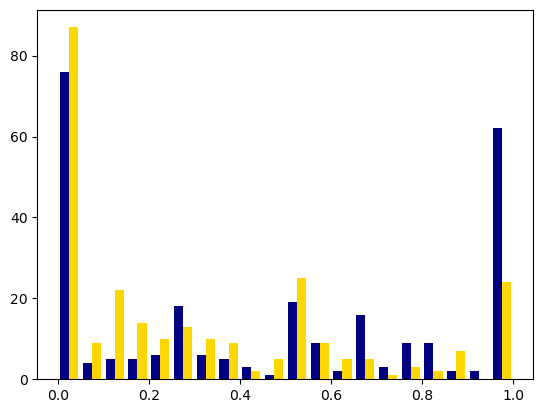

In [160]:
fig,ax = plt.subplots()
ax.hist(x=df1,bins=20, color=['navy', 'gold'])

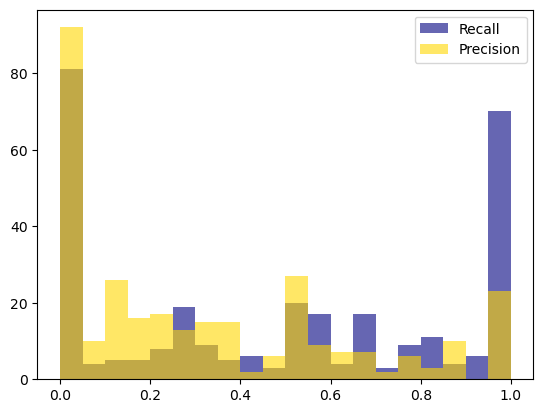

In [46]:
# BioModels species
plt.xlim([-0.05,1.05])
plt.xticks(np.arange(0.0, 1.2, step=0.2))
plt.hist(df1['recall'], 
         alpha=0.6, # the transaparency parameter
         label='Recall', bins=20,
         color='navy')
  
plt.hist(df1['precision'],
         alpha=0.6,
         label='Precision', bins=20,
         color='gold')
  
plt.legend(loc='upper right')
# plt.title('BioModels Species')
# plt.show()
plt.savefig(os.path.join(FIGURE_DIR, 'biomd_spec_hist.png'), dpi=300,
            bbox_inches='tight', pad_inches=0.0)

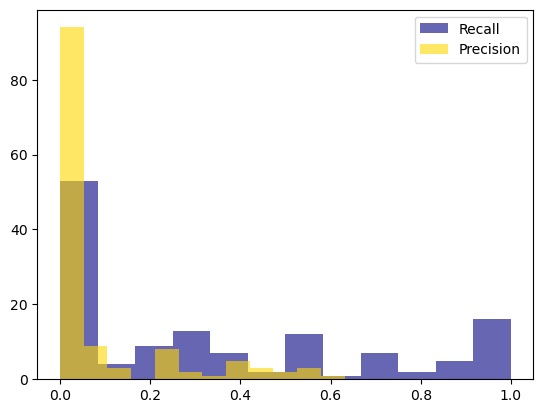

In [209]:
plt.xlim([-0.05,1.05])
plt.xticks(np.arange(0.0, 1.2, step=0.2))
plt.hist(df2['recall'], 
         alpha=0.6, # the transaparency parameter
         label='Recall', bins=12,
         color='navy')
  
plt.hist(df2['precision'],
         alpha=0.6,
         label='Precision', bins=12,
         color='gold')
  
plt.legend(loc='upper right')
# plt.title('BioModels Species')
# plt.show()
plt.savefig(os.path.join(FIGURE_DIR, 'biomd_reac_hist.png'), dpi=300,
            bbox_inches='tight', pad_inches=0.0)

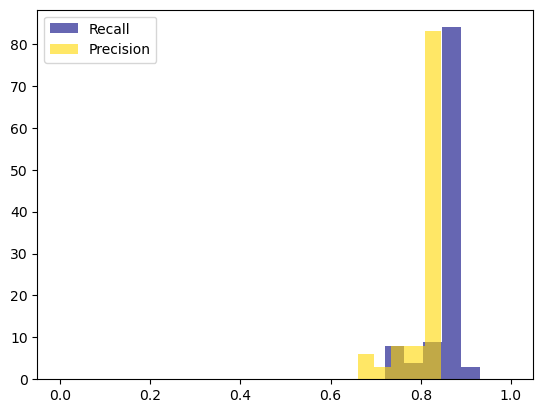

In [210]:
plt.xlim([-0.05,1.05])
plt.xticks(np.arange(0.0, 1.2, step=0.2))
plt.hist(df3['recall'], 
         alpha=0.6, # the transaparency parameter
         label='Recall', bins=5,
         color='navy')
  
plt.hist(df3['precision'],
         alpha=0.6,
         label='Precision', bins=5,
         color='gold')
  
plt.legend(loc='upper left')
# plt.show()
plt.savefig(os.path.join(FIGURE_DIR, 'bigg_spec_hist.png'), dpi=300,
            bbox_inches='tight', pad_inches=0.0)

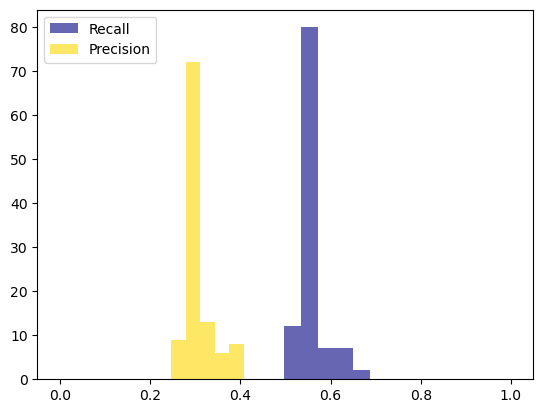

In [211]:
plt.xlim([-0.05,1.05])
plt.xticks(np.arange(0.0, 1.2, step=0.2))
plt.hist(df4['recall'], 
         alpha=0.6, # the transaparency parameter
         label='Recall', bins=5,
         color='navy')
  
plt.hist(df4['precision'],
         alpha=0.6,
         label='Precision', bins=5,
         color='gold')
  
plt.legend(loc='upper left')
# plt.show()
plt.savefig(os.path.join(FIGURE_DIR, 'bigg_reac_hist.png'), dpi=300,
            bbox_inches='tight', pad_inches=0.0)

## Scatter Plots (match score vs. recall/precision)

In [49]:
biomd_specdf_recall_score = df_ave_biomd_spec_results.loc[:, ['recall', 'match score']]
biomd_specdf_precision_score = df_ave_biomd_spec_results.loc[:, ['precision', 'match score']]

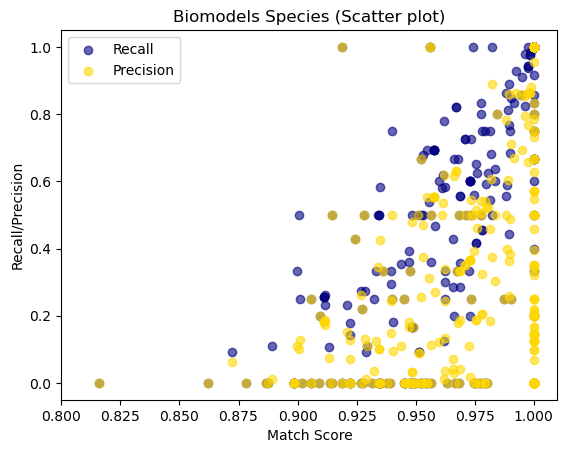

In [93]:
plt.xlim([0.80,1.01])
plt.xticks(np.arange(0.80, 1.01, step=0.025))
plt.scatter(y=df_ave_biomd_spec_results['recall'],
            x=df_ave_biomd_spec_results['match score'],
            alpha=0.6, # the transaparency parameter
            label='Recall', color='navy')
plt.scatter(y=df_ave_biomd_spec_results['precision'],
            x=df_ave_biomd_spec_results['match score'],
            alpha=0.6, # the transaparency parameter
            label='Precision', color='gold')
plt.xlabel("Match Score")
plt.ylabel("Recall/Precision")
plt.legend(loc='upper left')
plt.title("Biomodels Species (Scatter plot)")

TEMPFIG_DIR = os.path.join(FIGURE_DIR, 'temp')
plt.savefig(os.path.join(TEMPFIG_DIR, 'biomd_species_scatter.png'), dpi=300,
            bbox_inches='tight', pad_inches=0.0)

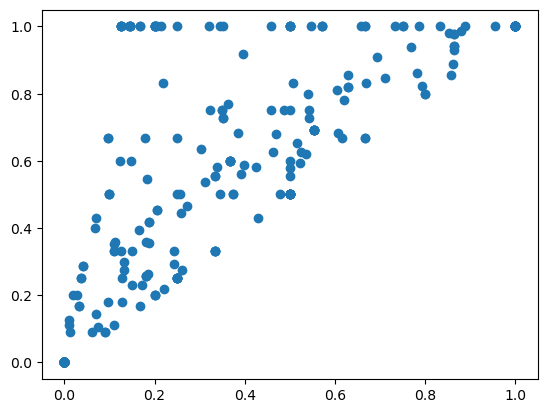

In [96]:
plt.scatter(df_ave_biomd_spec_results['precision'], df_ave_biomd_spec_results['recall'])

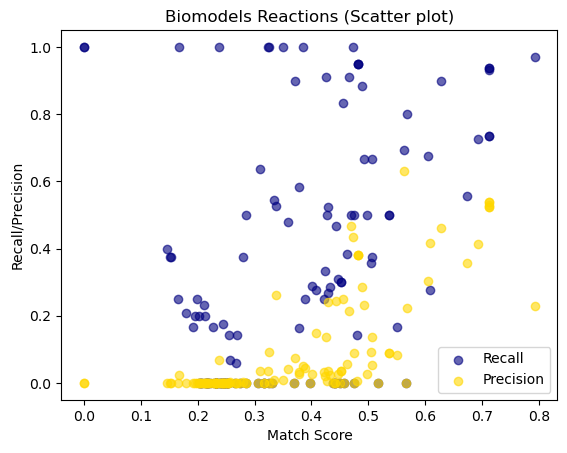

In [95]:
# plt.xlim([-0.05,1.05])
# plt.xticks(np.arange(0.0, 1.2, step=0.2))
plt.scatter(y=df_ave_biomd_reac_results['recall'],
            x=df_ave_biomd_reac_results['match score'],
            alpha=0.6, # the transaparency parameter
            label='Recall', color='navy')
plt.scatter(y=df_ave_biomd_reac_results['precision'],
            x=df_ave_biomd_reac_results['match score'],
            alpha=0.6, # the transaparency parameter
            label='Precision', color='gold')
plt.xlabel("Match Score")
plt.ylabel("Recall/Precision")
plt.legend(loc='lower right')
plt.title("Biomodels Reactions (Scatter plot)")

TEMPFIG_DIR = os.path.join(FIGURE_DIR, 'temp')
plt.savefig(os.path.join(TEMPFIG_DIR, 'biomd_reactions_scatter.png'), dpi=300,
            bbox_inches='tight', pad_inches=0.0)

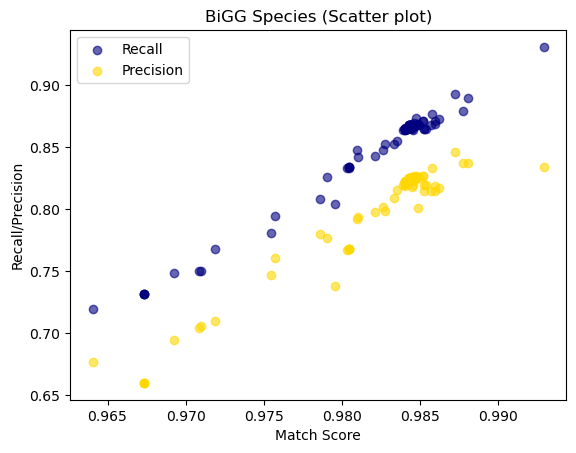

In [98]:
# plt.xlim([0.80,1.01])
# plt.xticks(np.arange(0.80, 1.01, step=0.025))
plt.scatter(y=df_ave_bigg_spec_results['recall'],
            x=df_ave_bigg_spec_results['match score'],
            alpha=0.6, # the transaparency parameter
            label='Recall', color='navy')
plt.scatter(y=df_ave_bigg_spec_results['precision'],
            x=df_ave_bigg_spec_results['match score'],
            alpha=0.6, # the transaparency parameter
            label='Precision', color='gold')
plt.xlabel("Match Score")
plt.ylabel("Recall/Precision")
plt.legend(loc='upper left')
plt.title("BiGG Species (Scatter plot)")

TEMPFIG_DIR = os.path.join(FIGURE_DIR, 'temp')
plt.savefig(os.path.join(TEMPFIG_DIR, 'bigg_species_scatter.png'), dpi=300,
            bbox_inches='tight', pad_inches=0.0)

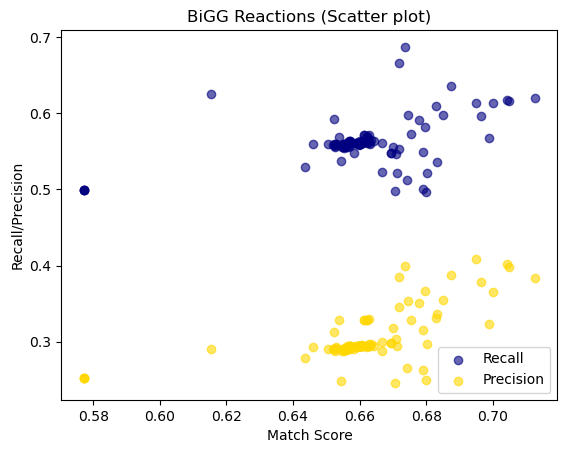

In [99]:
plt.scatter(y=df_ave_bigg_reac_results['recall'],
            x=df_ave_bigg_reac_results['match score'],
            alpha=0.6, # the transaparency parameter
            label='Recall', color='navy')
plt.scatter(y=df_ave_bigg_reac_results['precision'],
            x=df_ave_bigg_reac_results['match score'],
            alpha=0.6, # the transaparency parameter
            label='Precision', color='gold')
plt.xlabel("Match Score")
plt.ylabel("Recall/Precision")
plt.legend(loc='lower right')
plt.title("BiGG Reactions (Scatter plot)")

TEMPFIG_DIR = os.path.join(FIGURE_DIR, 'temp')
plt.savefig(os.path.join(TEMPFIG_DIR, 'bigg_reactions_scatter.png'), dpi=300,
            bbox_inches='tight', pad_inches=0.0)

In [105]:
# for a bit more study
import copy
df5 = copy.deepcopy(df_ave_biomd_spec_results)
df6 = copy.deepcopy(df_ave_biomd_reac_results)
df7 = copy.deepcopy(df_ave_bigg_spec_results)
df8 = copy.deepcopy(df_ave_bigg_reac_results)

In [119]:
# studying recall of species; 
for one_biomd in df5.index:
  recom = recommender.Recommender(os.path.join(BIOMODEL_DIR, one_biomd))
  recall_val = df5.loc[one_biomd, 'recall']
  if recall_val == 0.0:
    print("Model with low recall: %s" % one_biomd)
    print(recall_val)
    for one_k in recom.species.exist_annotation.keys():
      print(recom.species.getNameToUse(one_k))
      print(recom.species.exist_annotation[one_k])
    break

Model with low recall: BIOMD0000000037.xml
0.0
Gluc
['CHEBI:17234']


In [108]:
df5

,recall,precision,match score
BIOMD0000000002.xml,1.000,0.500,1.000000
BIOMD0000000013.xml,0.091,0.061,0.872409
BIOMD0000000015.xml,1.000,1.000,1.000000
BIOMD0000000017.xml,0.588,0.399,0.988471
BIOMD0000000018.xml,0.833,0.669,0.991778
...,...,...,...
BIOMD0000000947.xml,0.000,0.000,0.952667
BIOMD0000000948.xml,0.000,0.000,0.977500
BIOMD0000000961.xml,0.275,0.132,0.928750
BIOMD0000000966.xml,1.000,0.500,1.000000


In [196]:
def printReaction(r):
  """
  Print reaction 
  """
  reactants = [val.species for val in r.getListOfReactants()]
  products = [val.species for val in r.getListOfProducts()]
  return ' + '.join(reactants) + ' => ' + ' + '.join(products)

In [198]:
model = recom.sbml_document.getModel()
one_r = model.getReaction(one_val)
print(one_r.name)
print(printReaction(one_r))

2-acyl-glycerophospho-ethanolamine acyltransferase (n-C16:0)
M_2agpe160_c + M_atp_c + M_hdca_c => M_amp_c + M_pe160_c + M_ppi_c


In [202]:
count = 0
for one_val in res['candidates'].keys():
  one_cands = res['candidates'][one_val]
  exist_anots = recom.reactions.exist_annotation[one_val]
  if all([val not in one_cands for val in exist_anots]):
    model = recom.sbml_document.getModel()
    one_r = model.getReaction(one_val)
    print(one_r.name)
    print("Existing annotation:", exist_anots)
    print(printReaction(one_r))
    print()


2-acyl-glycerophospho-ethanolamine acyltransferase (n-C16:0)
Existing annotation: ['RHEA:10304']
M_2agpe160_c + M_atp_c + M_hdca_c => M_amp_c + M_pe160_c + M_ppi_c

2-acyl-glycerophospho-ethanolamine acyltransferase (n-C18:0)
Existing annotation: ['RHEA:10304']
M_2agpe180_c + M_atp_c + M_ocdca_c => M_amp_c + M_pe180_c + M_ppi_c

Arbutin 6-phosphate glucohydrolase
Existing annotation: ['RHEA:10772']
M_arbt6p_c + M_h2o_c => M_g6p_c + M_hqn_c

N-acetyl-D-glucosamine 1-phosphatase (periplasm)
Existing annotation: ['RHEA:19933']
M_acgam1p_p + M_h2o_p => M_acgam_p + M_pi_p

N-acetyl-D-galactosamine 1-phosphatase (periplasm)
Existing annotation: ['RHEA:19933']
M_acgal1p_p + M_h2o_p => M_acgal_p + M_pi_p

L-aspartate oxidase
Existing annotation: ['RHEA:25876']
M_asp__L_c + M_o2_c => M_h2o2_c + M_h_c + M_iasp_c

L-ascorbate 6-phosphate lactonase
Existing annotation: ['RHEA:28803']
M_ascb6p_c + M_h2o_c => M_3dhgulnp_c + M_h_c

Carbamate kinase
Existing annotation: ['RHEA:10152']
M_atp_c + M_co2_

In [200]:
count

35

In [188]:
exist_anots

['RHEA:10304']

In [191]:
recom.reactions.reaction_components[one_val]

['M_amp_c', 'M_pe160_c', 'M_atp_c', 'M_ppi_c', 'M_hdca_c', 'M_2agpe160_c']

In [189]:
one_val

'R_2AGPEAT160'

In [150]:
# run this, this time only using reactions whose components aare fully annotated

bigg_reac_recalls = []
bigg_reac_precisions = []
bigg_reac_scores = []

for idx, one_bigg in enumerate(biggs):
  if idx % 3 == 0:
    print("We are at %d." % idx)
  one_fpath = os.path.join(BIGG_DIR, one_bigg)
  recom = recommender.Recommender(libsbml_fpath=one_fpath)
  reacs2eval_raw = list(recom.reactions.exist_annotation.keys())
  reacs2eval = []
  for one_r in reacs2eval_raw: 
    comps = recom.reactions.reaction_components[one_r]
    if all([val in recom.species.exist_annotation_formula.keys() \
            for val in comps]):
      reacs2eval.append(one_r)
  res = recom.reactions.predictAnnotation(inp_spec_dict=recom.species.exist_annotation_formula,
                                          inp_reac_list=reacs2eval,
                                          inp_ref_mat=ra.REF_MAT,
                                          update=False)
  scores = res['match_score']
  mean_score = np.mean([np.mean([val[1] for val in scores[k]]) for k in scores.keys()])
  recall = tools.getRecall(ref=recom.reactions.exist_annotation, pred=res['candidates'])
  precision = tools.getPrecision(ref=recom.reactions.exist_annotation, pred=res['candidates'])
  bigg_reac_scores.append(mean_score)
  bigg_reac_recalls.append(recall)
  bigg_reac_precisions.append(precision)

We are at 0.
We are at 3.
We are at 6.
We are at 9.
We are at 12.
We are at 15.
We are at 18.
We are at 21.
We are at 24.
We are at 27.
We are at 30.
We are at 33.
We are at 36.
We are at 39.
We are at 42.
We are at 45.
We are at 48.
We are at 51.
We are at 54.
We are at 57.
We are at 60.
We are at 63.
We are at 66.
We are at 69.
We are at 72.
We are at 75.
We are at 78.
We are at 81.
We are at 84.
We are at 87.
We are at 90.
We are at 93.
We are at 96.
We are at 99.
We are at 102.
We are at 105.


In [148]:
bigg_reac_recalls

[0.802]

Text(0.5, 1.0, 'Bigg reaction accuracy: existing vs. predicted species annotations')

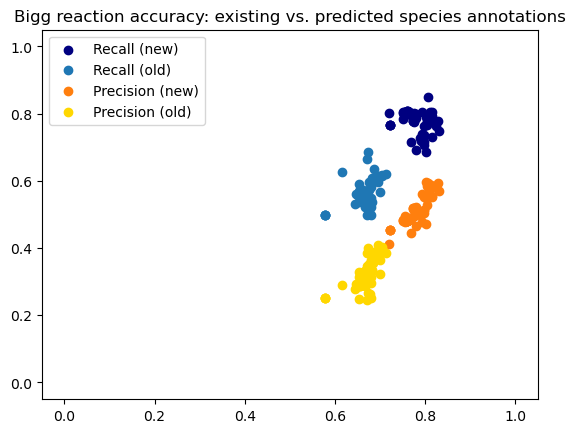

In [205]:
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.scatter(x=bigg_reac_scores, y=bigg_reac_recalls,
            color = 'navy', label='Recall (new)')
plt.scatter(x=df8['match score'], y=df8['recall'], label='Recall (old)')
plt.scatter(x=bigg_reac_scores, y=bigg_reac_precisions, label='Precision (new)') 
plt.scatter(x=df8['match score'], y=df8['precision'], 
            color='gold', label='Precision (old)')
plt.legend()
plt.title("Bigg reaction accuracy: existing vs. predicted species annotations")

## If above is in the right direction, I can filter the candidates to improve precision (while not sacrificing not too much recall)

In [206]:
# plt.xlim([-0.05,1.05])
# plt.ylim([-0.05,1.05])
# plt.scatter(x=df8['match score'], y=df8['recall'], label='Recall')
# plt.scatter(x=df8['match score'], y=df8['precision'], label='Precision')
# plt.legend()
# plt.title("Bigg reaction accuracy: if predicted species annotations")

In [139]:
recom.reactions.exist_annotation['R_PGI']

['RHEA:11816']

In [140]:
tools.getRecall(ref=recom.reactions.exist_annotation, pred=res['candidates'])

0.802

In [142]:
tools.getPrecision(ref=recom.reactions.exist_annotation, pred=res['candidates'])

0.411

In [ ]:
# make recommendations (compute time)
time1 = time.time()
recoms = recom.getReactionListRecommendation(pred_ids=reacs2eval)
time2 = time.time()
recom_stats = recom.getReactionStatistics(model_mean=True)
ave_recall = recom_stats[cn.RECALL]
ave_precision = recom_stats[cn.PRECISION]

In [ ]:
recom.reactions.predictAnnotation